# Exploratory Data Analysis
Ashley-Lauren Mighty  
December 2017

---


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from bs4 import BeautifulSoup

<a id='imports'></a>
# Imports & Data Cleaning

In [2]:
#read in CSVs
book_list = pd.read_csv('CSVs/book_list45.csv')
book_info = pd.read_csv('CSVs/book_info45.csv')

#concatonate the scraped data with the original book list
df = pd.concat([book_list, book_info], axis = 1)

In [3]:
#df.info()

In [4]:
# drop all null genres & descriptions - lose 192 rows in total
df.dropna(subset=['genre','description'],inplace=True)

In [5]:
# clean columns
# round the average ratings to create easy to understand groupings
df.avg_rating = [float(x) for x in df.avg_rating]
df.avg_rating=[(round(x*8))/8 for x in df.avg_rating]
#
df.description = [BeautifulSoup(x, 'lxml').get_text() for x in df.description ]

In [6]:
df.head(3)

,book_id,year,title,image_url,author,avg_rating,description,genre,is_ebook
0,2767052,2008.0,The Hunger Games,https://images.gr-assets.com/books/1447303603m...,Suzanne Collins,4.375,Winning will make you famous. Losing means cer...,Young Adult,False
1,3,1997.0,Harry Potter and the Philosopher's Stone,https://images.gr-assets.com/books/1474154022m...,J.K. Rowling,4.500,Harry Potter's life is miserable. His parents ...,Young Adult,False
2,41865,2005.0,Twilight,https://images.gr-assets.com/books/1361039443m...,Stephenie Meyer,3.625,About three things I was absolutely positive.F...,Young Adult,False


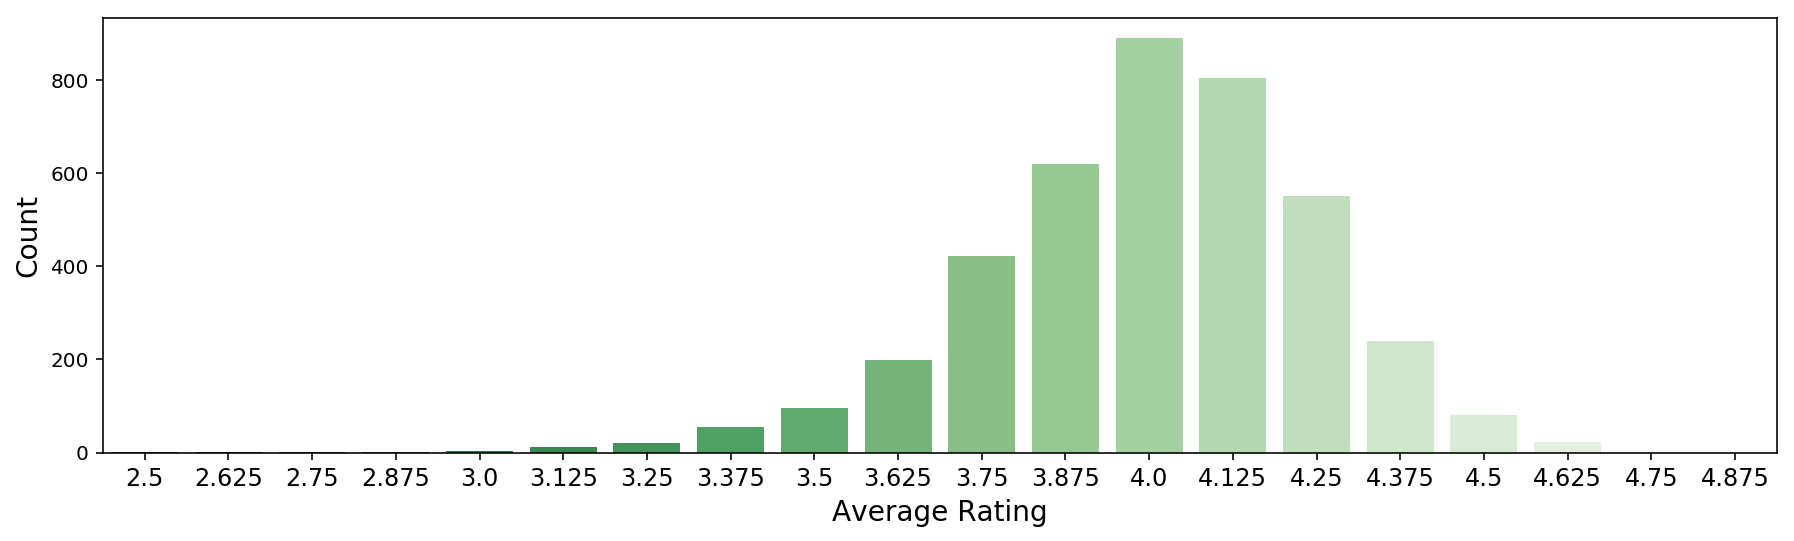

In [7]:
plt.subplots(figsize=(15,4))
sns.countplot(x='avg_rating', data = df, palette='Greens_r')
plt.xticks(rotation=0, fontsize=12 ,ha='center') 
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Count', fontsize=14);

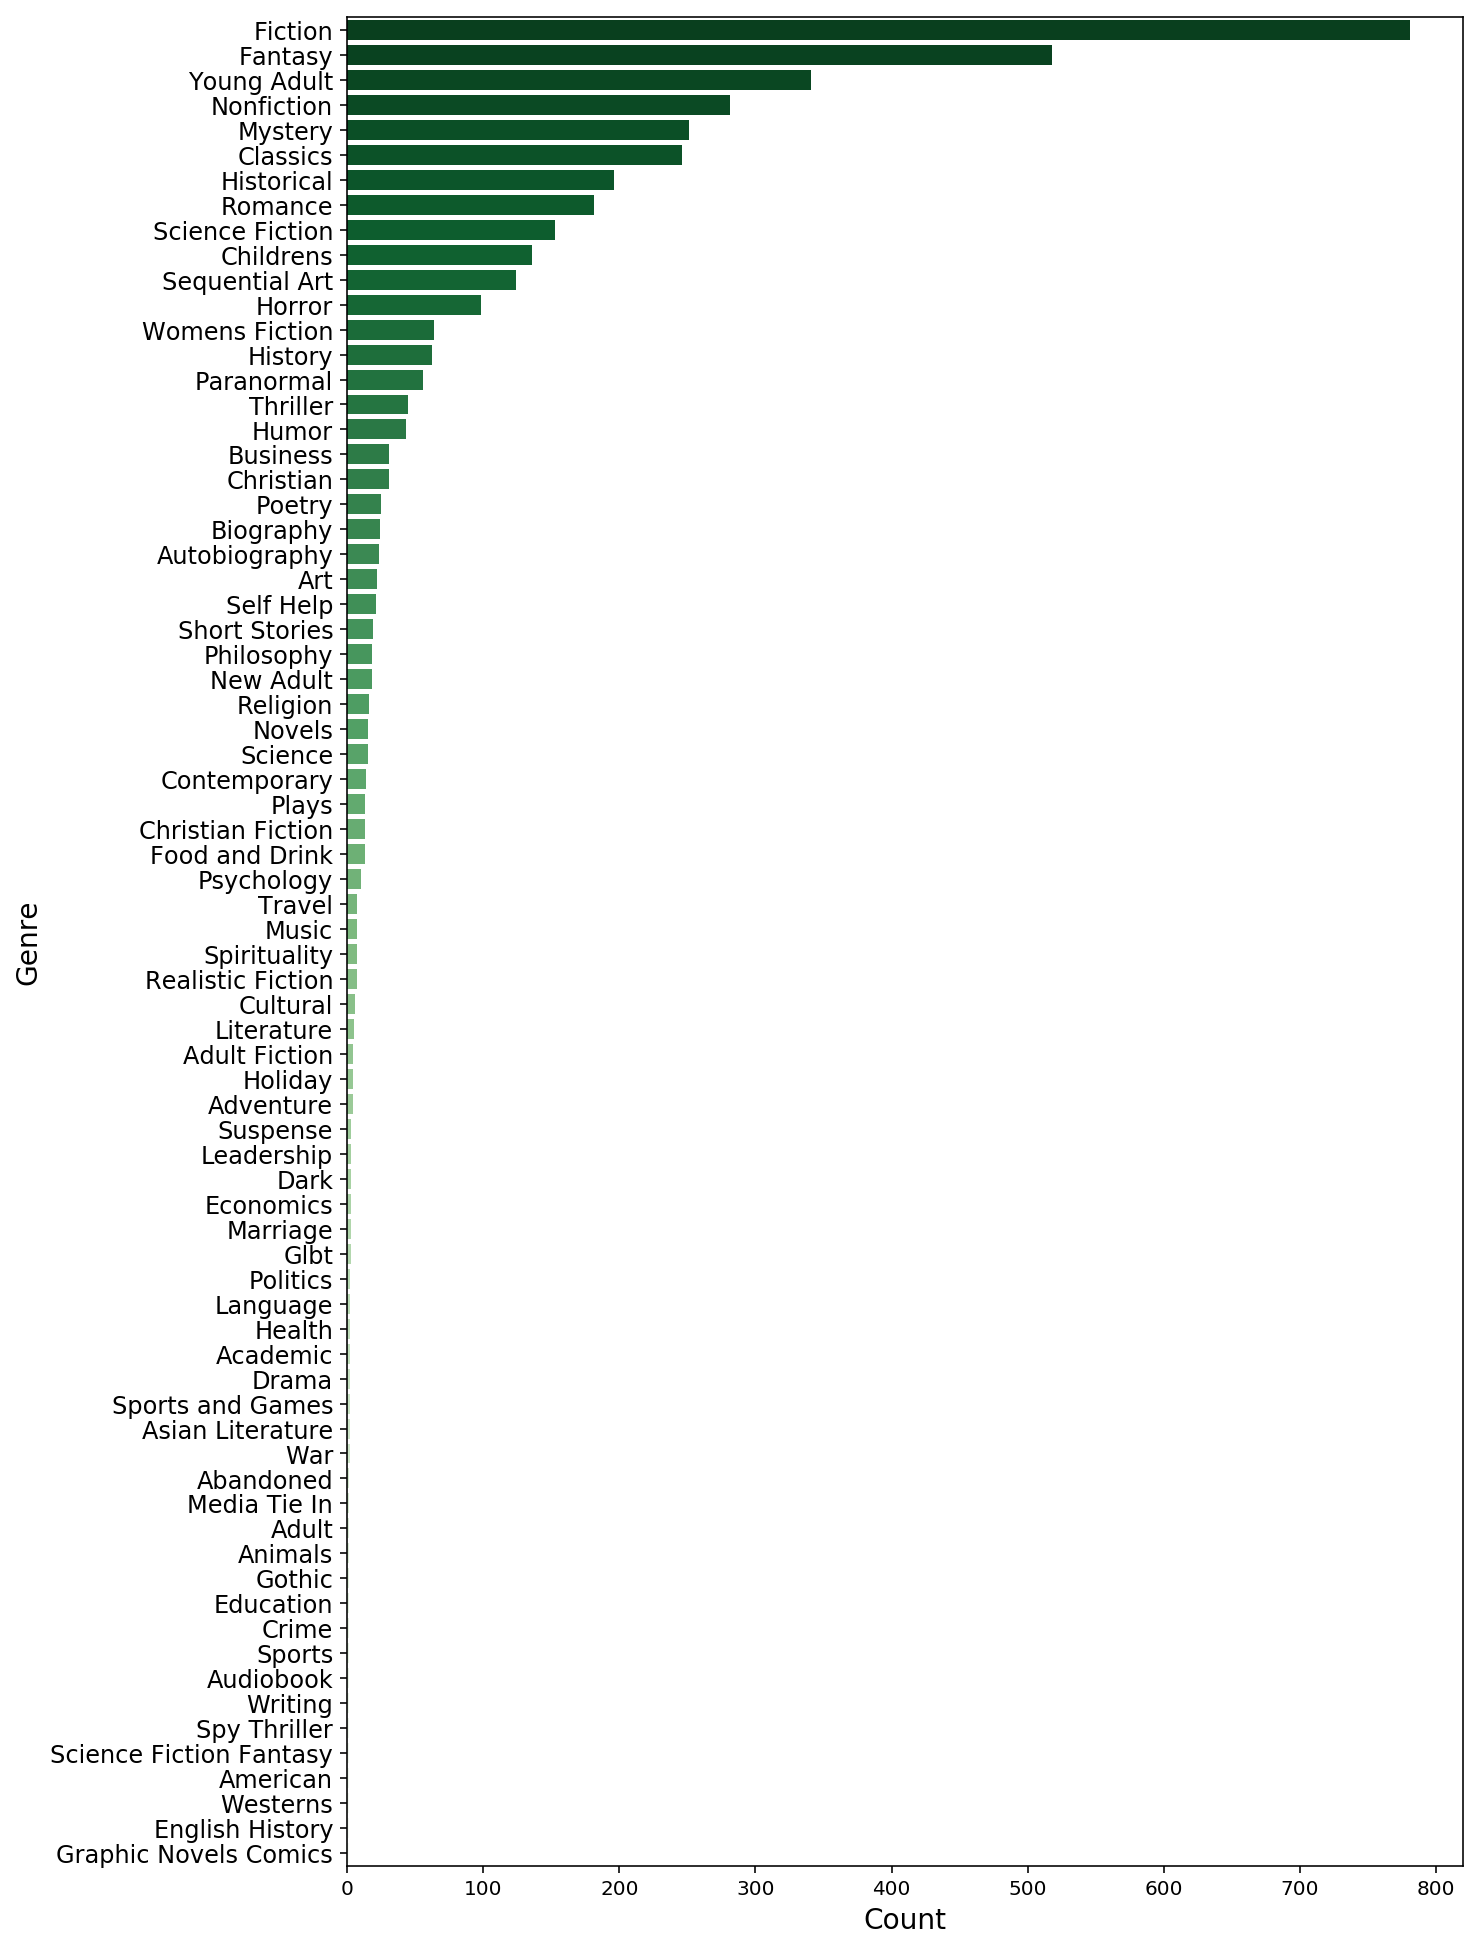

In [8]:
plt.subplots(figsize=(10,17))
sns.countplot(y='genre',palette='Greens_r', data = df, order = df.genre.value_counts().index)
plt.yticks(rotation=0, fontsize=12 ,ha='right') 
plt.ylabel('Genre', fontsize=14)
plt.xlabel('Count', fontsize=14);

In [9]:
#consolidate similar genres to reduce the complexity of the dataset
genre_dict = {"Womens Fiction":"Fiction", "Adult Fiction":"Fiction","New Adult":"Fiction", 
              "Short Stories":"Fiction", "Asian Literature":"Fiction",
              "Literature":"Classics","Adult":"Fiction","Contemporary":"Fiction",
              "Cultural":"Fiction","Realistic Fiction":"Young Adult","Paranormal":"Horror"
              ,"Sequential Art":"Graphic Novel","Graphic Novels Comics":"Graphic Novel",
              "Science Fiction Fantasy":"Fantasy", "Paranormal":"Horror", 
              "History":"Historical","Drama":"Plays","Historial":"Historical Fiction",
              "Thriller":"Mystery", "Christian":"Spirituality",
             "Marriage":"Self Help", "Autobiography":"Biography"}
df.genre.replace(genre_dict, inplace=True)

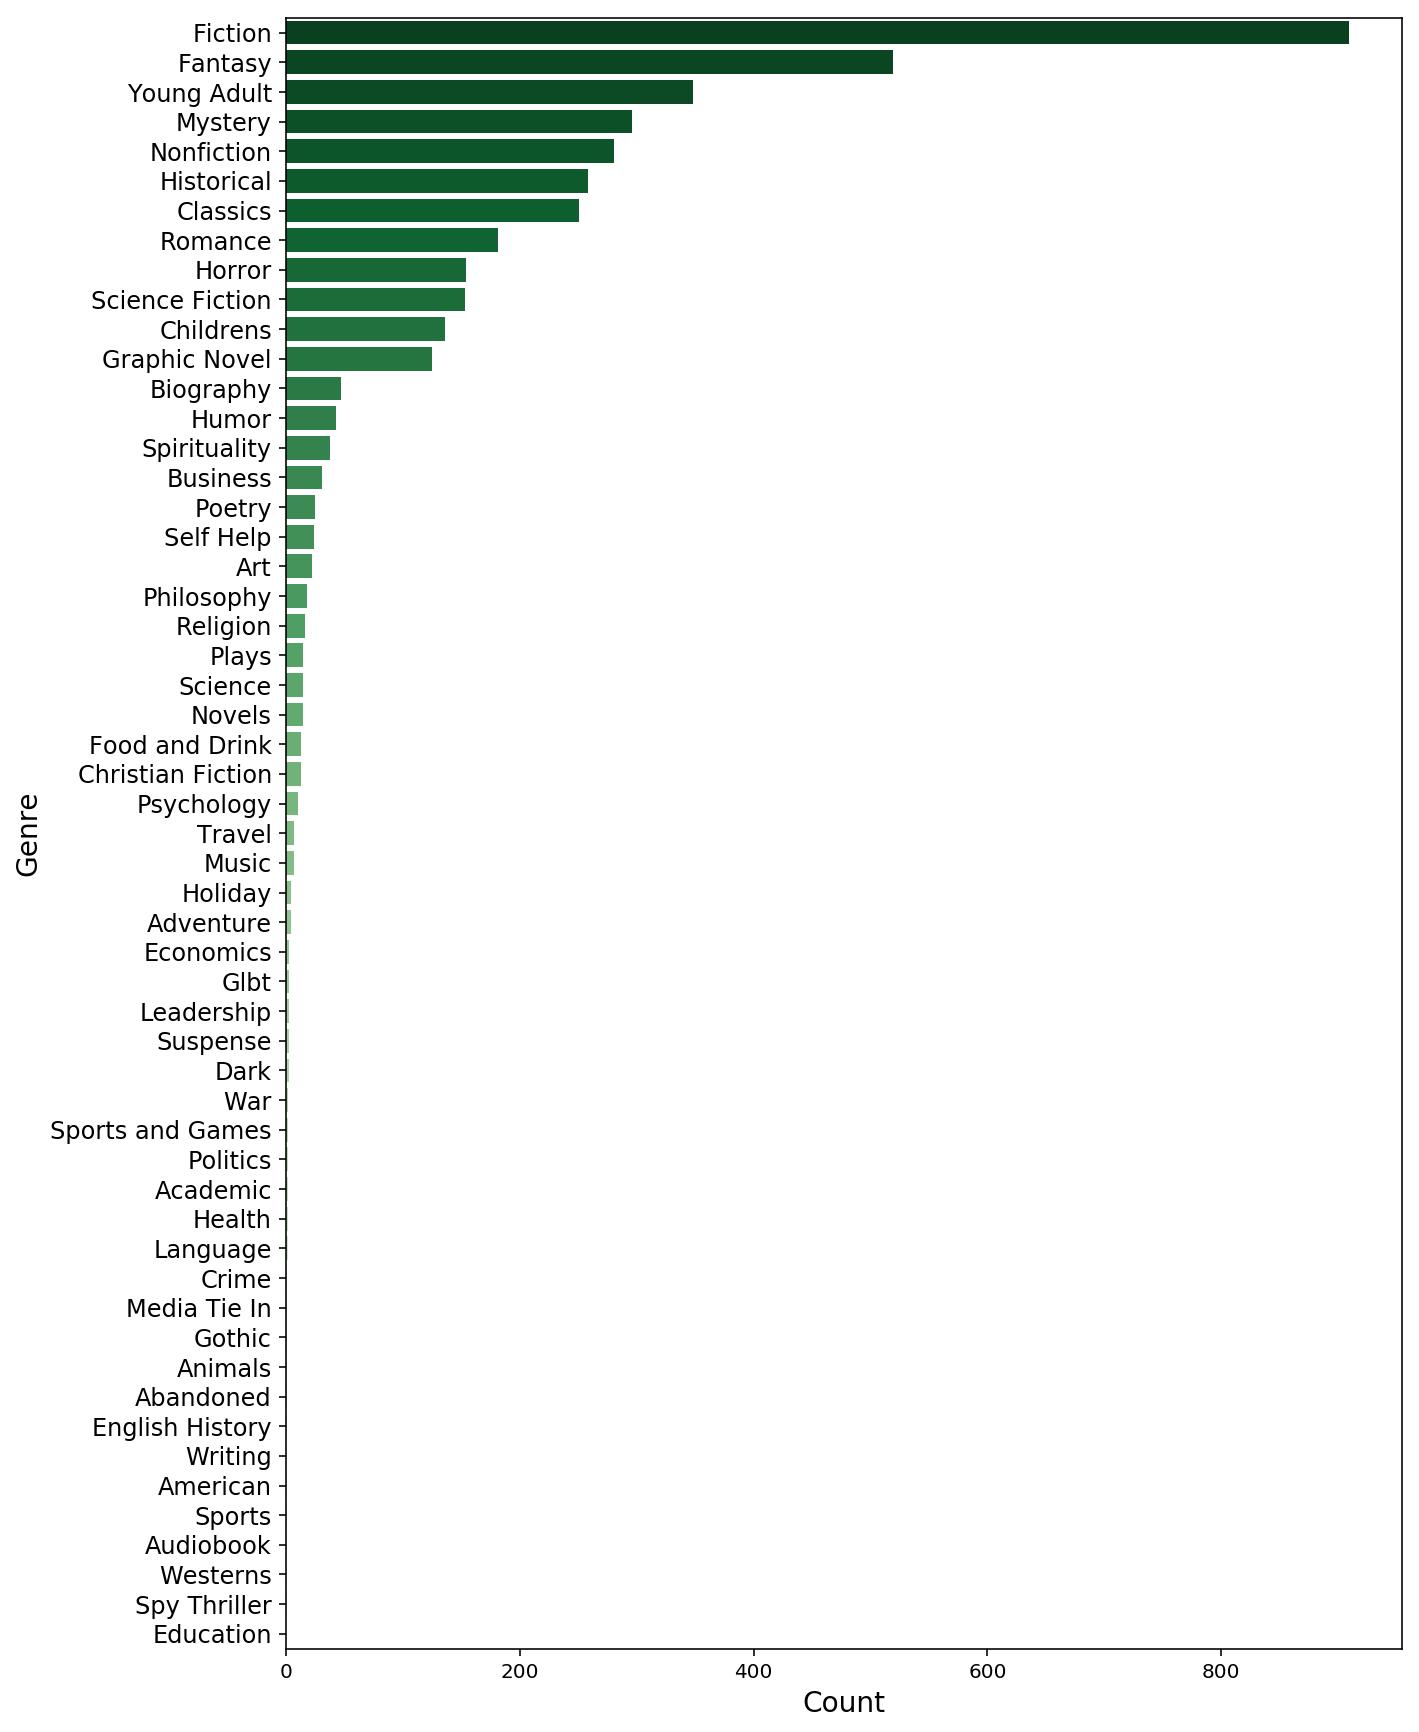

In [10]:
plt.subplots(figsize=(10,15))
sns.countplot(y='genre',palette='Greens_r', data = df, order = df.genre.value_counts().index)
plt.yticks(rotation=0, fontsize=12 ,ha='right')
plt.ylabel('Genre', fontsize=14)
plt.xlabel('Count', fontsize=14);

In [11]:
#limit the dataset to the top 11 genres
df = df[(df.genre.isin(["Young Adult", "Classics","Fiction","Nonfiction","Fantasy",
                        "Mystery","Romance","Childrens","Historical","Science Fiction",
                        "Horror"]))]

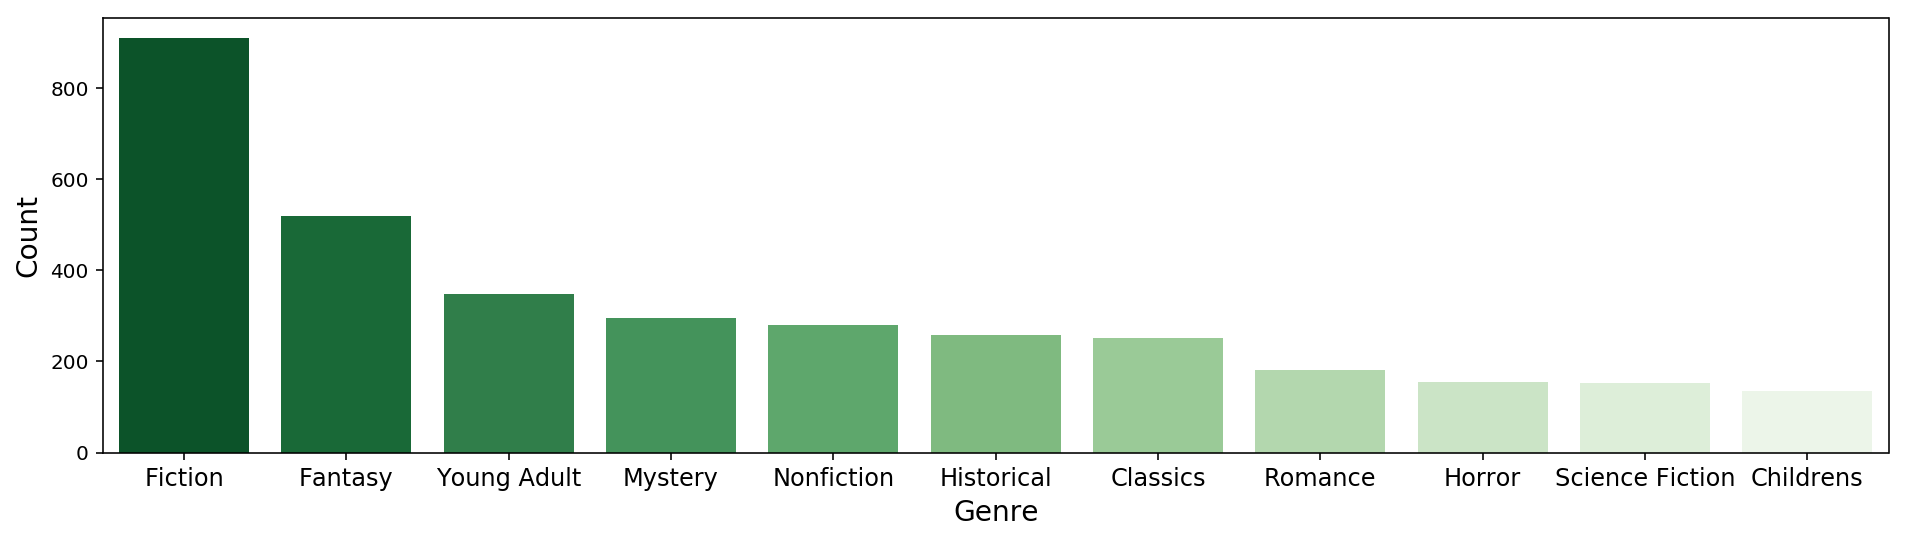

In [12]:
plt.subplots(figsize=(16,4))
sns.countplot(x='genre', data = df, palette ='Greens_r', order = df.genre.value_counts().index)
plt.xticks(rotation=0, fontsize=12 ,ha='center') 
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14);

In [13]:
#save final dataset to CSV
df.to_csv('CSVs/df_final', index=False)

# Next Up: [Modeling](Modeling.ipynb)